In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [6]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [8]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [9]:
print(df.isnull().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [10]:
df.drop(columns=['Person ID'], inplace=True)

In [11]:
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)


In [12]:
df.drop(columns=['Blood Pressure'], inplace=True)

In [13]:
df = pd.get_dummies(df, columns=['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], drop_first=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              374 non-null    int64  
 1   Sleep Duration                   374 non-null    float64
 2   Quality of Sleep                 374 non-null    int64  
 3   Physical Activity Level          374 non-null    int64  
 4   Stress Level                     374 non-null    int64  
 5   Heart Rate                       374 non-null    int64  
 6   Daily Steps                      374 non-null    int64  
 7   Systolic_BP                      374 non-null    float64
 8   Diastolic_BP                     374 non-null    float64
 9   Gender_Male                      374 non-null    bool   
 10  Occupation_Doctor                374 non-null    bool   
 11  Occupation_Engineer              374 non-null    bool   
 12  Occupation_Lawyer     

In [15]:
y = df['Stress Level']

In [16]:
X = df.drop(columns=['Stress Level'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (299, 23)
Testing data shape: (75, 23)


In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


In [20]:
y_pred = model.predict(X_test)

In [21]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [22]:
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')

RMSE: 0.35
R² Score: 0.96


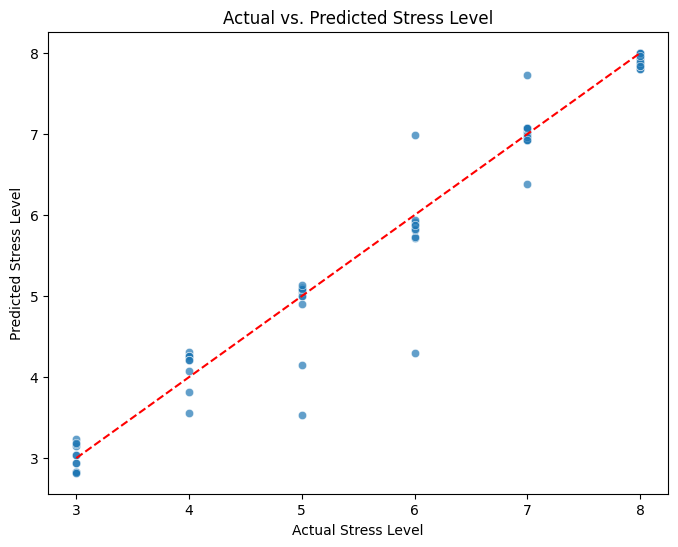

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Stress Level")
plt.ylabel("Predicted Stress Level")
plt.title("Actual vs. Predicted Stress Level")
plt.show()

In [24]:
residuals = y_test - y_pred

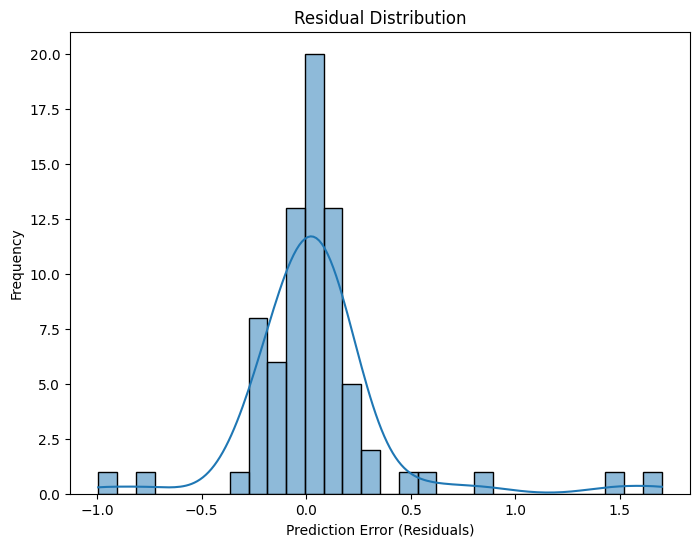

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

In [26]:
import joblib

In [27]:
joblib.dump(model, "stress_level_model.pkl")

print("Model saved successfully!")

Model saved successfully!
